In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/krishna/Downloads/US_Heart_Patients.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df = df.fillna(method='ffill')

In [5]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
!pip install pydotplus

In [9]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [10]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Apps

  added / updated specs:
    - python-graphviz


The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.13.2-py_0

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.8.0-py37_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [11]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

C:\Apps\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [13]:
features = X.columns

dot_data = export_graphviz(dt, out_file=None, feature_names=features)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [15]:
from sklearn.tree import DecisionTreeClassifier



dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)
y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [16]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve



print('Accuracy of Decision Tree_Train:',accuracy_score(y_pred_train,y_train))

print('Accuracy of Decision Tree_Test:',accuracy_score(y_pred,y_test))

Accuracy of Decision Tree_Train: 1.0
Accuracy of Decision Tree_Test: 0.7783018867924528


# Hyperparameter Tuning

# Grid Search

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:
dt = DecisionTreeClassifier()
params = {'max_depth' : [2,3,4,5,6,7,8],
         'min_samples_split': [2,3,4,5,6,7,8,9,10],
         'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [41]:
dt = DecisionTreeClassifier(**gsearch.best_params_)


dt.fit(X_train,y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree_Train:',accuracy_score(y_pred_train,y_train))
print('Accuracy of Decision Tree_Test:',accuracy_score(y_pred,y_test))

Accuracy of Decision Tree_Train: 0.8460242587601078
Accuracy of Decision Tree_Test: 0.8529874213836478


In [42]:
print('Auc of Decision Tree_Train:',roc_auc_score(y_train,y_prob_train))
print('Auc of Decision Tree_Test:',roc_auc_score(y_test,y_prob))

Auc of Decision Tree_Train: 0.6691859973665107
Auc of Decision Tree_Test: 0.6800931516301536


# Hyperparameter Tuning - Random Search

In [48]:
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth': sp_randint(2,10),
         'min_samples_split': sp_randint(2,50),
         'min_samples_leaf': sp_randint(1,20),
         'criterion':['gini','entropy']}

rand_search = RandomizedSearchCV(dt, param_distributions=params, cv=3,
                                random_state=1)

rand_search.fit(X, y)

print(rand_search.best_params_
)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 17, 'min_samples_split': 3}


In [49]:
dt = DecisionTreeClassifier(**gsearch.best_params_)


dt.fit(X_train,y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree_Train:',accuracy_score(y_pred_train,y_train))
print('Accuracy of Decision Tree_Test:',accuracy_score(y_pred,y_test))

Accuracy of Decision Tree_Train: 0.8460242587601078
Accuracy of Decision Tree_Test: 0.8529874213836478


In [51]:
print('Auc of Decision Tree_Train:',roc_auc_score(y_train,y_prob_train))
print('Auc of Decision Tree_Test:',roc_auc_score(y_test,y_prob))

Auc of Decision Tree_Train: 0.6691859973665107
Auc of Decision Tree_Test: 0.6800931516301536


# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=1)

dt = DecisionTreeClassifier(**gsearch.best_params_)
rfc.fit(X_train,y_train)
y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]


print('Accuracy of Random Forest-Train: ',accuracy_score(y_pred_train,y_train))

print('Accuracy of Random Forest-Test: ',accuracy_score(y_pred,y_test))

Accuracy of Random Forest-Train:  0.9797843665768194
Accuracy of Random Forest-Test:  0.845125786163522


In [56]:
print('Accuracy of Random Forest-Train: ',roc_auc_score(y_train,y_prob_train))

print('Accuracy Random Forest-Test: ',roc_auc_score(y_test,y_prob))

Accuracy of Random Forest-Train:  0.9994444575160323
Accuracy Random Forest-Test:  0.6364055299539171


# Hyperparameter Tuning of Random Forest

In [117]:
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,25),
         'criterion':['gini','entropy'],
         'max_depth': sp_randint(2,10),
         'min_samples_split': sp_randint(2,20),
         'min_samples_leaf': sp_randint(1,20),
         'max_features':sp_randint(2,15)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params,
                                 cv=3, random_state=1)

rand_search_rfc.fit(X,y)
print(rand_search_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 12, 'min_samples_leaf': 17, 'min_samples_split': 15, 'n_estimators': 24}


In [118]:


rfc = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc.fit(X_train,y_train)
y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]


print('Accuracy of Random Forest-Train: ',accuracy_score(y_pred_train,y_train))

print('Accuracy of Random Forest-Test: ',accuracy_score(y_pred,y_test))

Accuracy of Random Forest-Train:  0.8574797843665768
Accuracy of Random Forest-Test:  0.8522012578616353


In [119]:
print('AUC of Random Forest-Train: ',roc_auc_score(y_train,y_prob_train))

print('AUC Random Forest-Test: ',roc_auc_score(y_test,y_prob))

AUC of Random Forest-Train:  0.8274201827059406
AUC Random Forest-Test:  0.7142068557628329


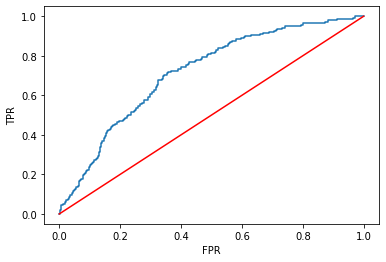

In [66]:
fpr,tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# K-NN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [120]:
knn.fit(X_train,y_train)

y_pred_train = knn.predict(X_train)
y_prob_train = knn.predict_proba(X_train)[:,1]


y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

print('Accuracy of K-NN-Train: ',accuracy_score(y_pred_train,y_train))
print('Accuracy of K-NN-Test: ',accuracy_score(y_pred,y_test))

Accuracy of K-NN-Train:  0.8493935309973046
Accuracy of K-NN-Test:  0.8522012578616353


In [121]:
knn = KNeighborsClassifier()

params = {'n_neighbors': sp_randint(1,25),
         'p':sp_randint(1,5)}

rand_search_knn = RandomizedSearchCV(knn, param_distributions=params,
                                 cv=3, random_state=1)

rand_search_knn.fit(X,y)
print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 12, 'min_samples_leaf': 17, 'min_samples_split': 15, 'n_estimators': 24}


In [122]:
knn = KNeighborsClassifier(**rand_search_knn.best_params_)

knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_prob_train = knn.predict_proba(X_train)[:,1]
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]


print('Accuracy of KNN-Train: ',accuracy_score(y_pred_train,y_train))

print('Accuracy of KNN-Test: ',accuracy_score(y_pred,y_test))

Accuracy of KNN-Train:  0.8493935309973046
Accuracy of KNN-Test:  0.8522012578616353


In [123]:
print('AUC of KNN -Train: ',roc_auc_score(y_train,y_prob_train))

print('AUC  KNN-Test: ',roc_auc_score(y_test,y_prob))

AUC of KNN -Train:  0.7578658279935896
AUC  KNN-Test:  0.6650065304714261


# Stacking Algorithms

In [124]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [125]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)
knn = KNeighborsClassifier(**rand_search_knn.best_params_)

In [126]:
clf = VotingClassifier(estimators=[('lr',lr),('rfc',rfc),('knn',knn)],voting='soft')

clf.fit(X_train,y_train)

y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

In [127]:
print('Accuracy of stacked-Train: ',accuracy_score(y_pred_train,y_train))

print('Accuracy of stacked-Test: ',accuracy_score(y_pred,y_test))

Accuracy of stacked-Train:  0.8527628032345014
Accuracy of stacked-Test:  0.8545597484276729


In [128]:
print('AUC of stacked -Train: ',roc_auc_score(y_train,y_prob_train))

print('AUC  stacked-Test: ',roc_auc_score(y_test,y_prob))

AUC of stacked -Train:  0.7991001518918509
AUC  stacked-Test:  0.7392592227506838


In [129]:
clf = VotingClassifier(estimators=[('lr',lr),('rfc',rfc),('knn',knn)],
                       voting='soft',weights=[2,3,1])

clf.fit(X_train,y_train)

y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

In [130]:
print('Accuracy of stacked-Train: ',accuracy_score(y_pred_train,y_train))

print('Accuracy of stacked-Test: ',accuracy_score(y_pred,y_test))

Accuracy of stacked-Train:  0.8534366576819407
Accuracy of stacked-Test:  0.8545597484276729


In [131]:
print('AUC of stacked -Train: ',roc_auc_score(y_train,y_prob_train))

print('AUC  stacked-Test: ',roc_auc_score(y_test,y_prob))

AUC of stacked -Train:  0.8071339497894167
AUC  stacked-Test:  0.7335321225264299
